In [1]:
from classy import Class
import matplotlib.pyplot as plt
import numpy as np

In [25]:
#redshift
z = 0
A_s = 2.100549e-09
n_s = 0.965

In [44]:
LambdaCDM = Class()
LambdaCDM.set({'omega_b':0.0223828,'omega_cdm':0.1201075,'h':0.67810,'A_s':A_s,'n_s':n_s,'tau_reio':0.05430842,'N_ncdm':1, 'm_ncdm':0.06})
LambdaCDM.set({'output':'tCl,pCl,lCl,mPk,mTk','lensing':'yes','P_k_max_1/Mpc':3.0,})
# launch the class
LambdaCDM.compute()

In [45]:
a_f = 1/1+z
H_0 = LambdaCDM.h()*100
omega_mz = LambdaCDM.Omega_m()
c = 299792.458

In [49]:
primordial = LambdaCDM.get_primordial()
k_piv = 0.05 
k_1 = primordial['k [1/Mpc]']
Ppk = []
for i in range(len(k_1)):
    Ppk.append(A_s*(k_1[i] / k_piv)**(LambdaCDM.n_s()-1))
Ppk_cl = primordial['P_scalar(k)']
Pk = []
Phi = []
for k in k_1:
        Pk.append(LambdaCDM.pk(k * LambdaCDM.h(), 0.) * LambdaCDM.h() ** 3)
for i in range (len(k_1)):
    Phi.append(k_1[i]**(1.5)*np.sqrt(Pk[i]/Ppk_cl[i])*(3*(H_0**2)*omega_mz)/(2*((c*k_1[i])**2)*a_f))

[]

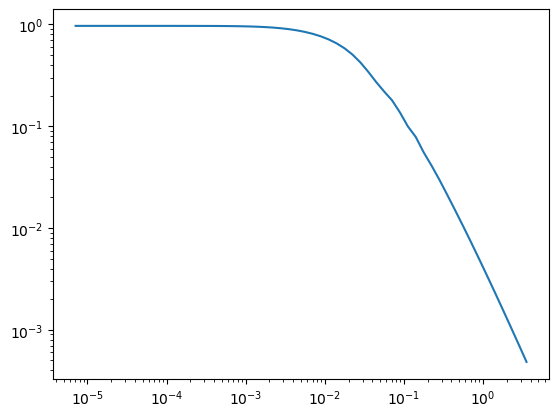

In [50]:
plt.plot(k_1,Phi)
plt.loglog()